## NumPy
Elements of a list begin indexing from $0$ and end at $n - 1$, where $n$ is the length of the array. (len(x)-1)
can slice 2-d array with A[:, 0]

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#Arrays are indexed in the same way as lists in Python
stock_list = [3.5, 5, 2, 8, 4.2]
returns = np.array(stock_list)
A = np.array([[1, 2], [3, 4]])
mean = np.mean(returns)
print (A, np.log(returns), mean)
# correlation
#print("AAPL and SPY: ", np.corrcoef(x1,x2)[0,1])

[[1 2]
 [3 4]] [1.25276297 1.60943791 0.69314718 2.07944154 1.43508453] 4.54


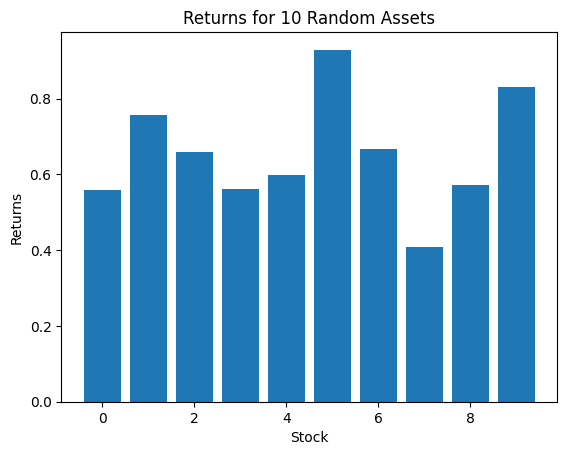

In [11]:
# creat n x 100 array
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))
#random dist'n (mean, std dev, N)
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1 #daily returns asset 1
assets[0] = np.cumprod(R_1) #cumulative asset price

# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)

mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Calculating Expected Return

In [12]:
#generate n random wheights
weights = np.random.uniform(0, 1, N)
# rescale so they add to 1
weights = weights/np.sum(weights)
#mean return is dot product of two arrays - weights * returns
p_returns = np.dot(weights, mean_returns)
print ("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  0.6329924372579137


### Calculating portfolio Variance

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

In [14]:
cov_mat = np.cov(returns) #10 by 10 matrix of covariances - C
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print ("Portfolio volatility: ", vol_p)
#alternative calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print ("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.03179648645159103
Portfolio volatility:  0.03179648645159103


#### Calculating Sharpe Ratio
$$R = \frac{E[r_a - r_b]}{\sqrt{Var(r_a - r_b)}}$$


In [ ]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2012-01-01'
end = '2015-01-01'
# Use an ETF that tracks 3-month T-bills as our risk-free rate of return
treasury_ret = get_pricing('BIL', fields='price', start_date=start, end_date=end).pct_change()[1:]
pricing = get_pricing('AMZN', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:] # Get the returns on the asset

# Compute the running Sharpe ratio
running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

# Plot running Sharpe ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots()
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100]);
ticks = ax1.get_xticks()
ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');

In [ ]:
# Compute the mean and std of the running Sharpe ratios up to 100 days before the end
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

# Plot running Sharpe ratio
_, ax2 = plt.subplots()
ax2.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
ax2.plot(range(90, len(returns)), running_sharpe)

# Plot its mean and the +/- 1 standard deviation lines
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# Indicate where we computed the mean and standard deviations
# Everything after this is 'out of sample' which we are comparing with the estimated mean and std
ax2.axvline(len(returns) - 100, color='pink');
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

print ('Mean of running Sharpe ratio:', mean_rs)
print ('std of running Sharpe ratio:', std_rs)